## Imports


In [90]:
import optuna
from numba.np.arraymath import np_select
from pandas.core.interchange.dataframe_protocol import DataFrame

# Data Set
from sklearn.datasets import load_diabetes

# Data Management, metrics and model selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Features Selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,RFE, RFECV, SelectFromModel, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance


#Plots
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#Other
import  numpy as np
import pandas as pd
import time

#Feature Importance
from sklearn.inspection import permutation_importance

# Data and Data split

In [91]:
seed = 42
data = load_diabetes()

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=seed)
y_train, y_test = y_train.reshape(-1, 1).ravel(), y_test.reshape(-1, 1).ravel()

## Scatter Matrix

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>,
        <Axes: xlabel='4', ylabel='0'>, <Axes: xlabel='5', ylabel='0'>,
        <Axes: xlabel='6', ylabel='0'>, <Axes: xlabel='7', ylabel='0'>,
        <Axes: xlabel='8', ylabel='0'>, <Axes: xlabel='9', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>,
        <Axes: xlabel='4', ylabel='1'>, <Axes: xlabel='5', ylabel='1'>,
        <Axes: xlabel='6', ylabel='1'>, <Axes: xlabel='7', ylabel='1'>,
        <Axes: xlabel='8', ylabel='1'>, <Axes: xlabel='9', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>,
        <Axes: xlabel='4', ylabel='2'>, <Axes: xlabel='5', ylabel='2'>,
        <Axes: xlabel='6', ylabel='2'>, <Axes: xlabel='7', yla

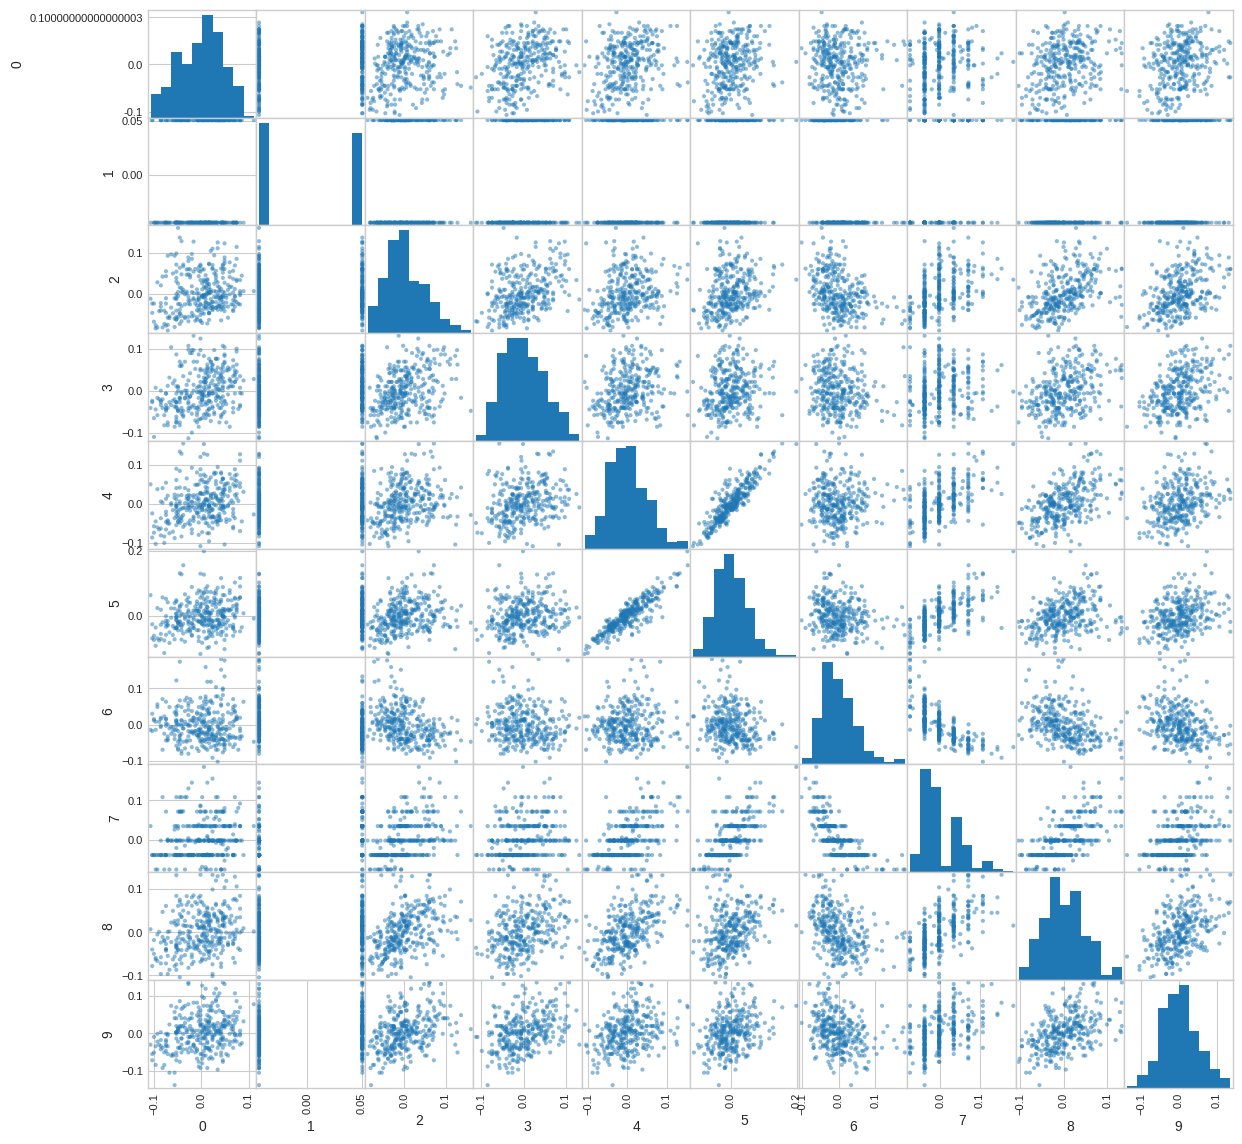

In [92]:
scatter_matrix(pd.DataFrame(x_train), figsize=(14,14))

## Correlation Matrix

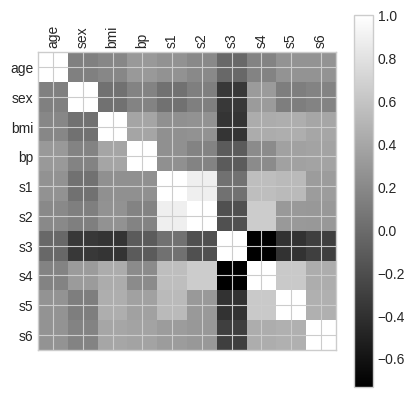

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,variable,VIF,Variance
age,1.000000,0.136522,0.181976,0.308406,0.261534,0.200301,-0.023100,0.165340,0.270981,0.262201,age,1.202558,0.002137
sex,0.136522,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936,sex,1.240147,0.002265
bmi,0.181976,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699,bmi,1.554188,0.002302
bp,0.308406,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421,bp,1.414228,0.002297
s1,0.261534,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666,s1,53.872720,0.002300
s2,0.200301,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647,s2,34.744973,0.002291
s3,-0.023100,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091,s3,13.794775,0.002244
s4,0.165340,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489,s4,9.267345,0.002350
s5,0.270981,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878,s5,10.118703,0.002294
s6,0.262201,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000,s6,1.493868,0.002298


In [93]:
names = data.feature_names
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')
plt.matshow(corr_mtx, cmap="grey")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.show()


vif_var_score = corr_mtx
vif_var_score['variable'] = names
vif_var_score['VIF'] = [vif(df_features.values, i) for i in range(len(names))]
vif_var_score['Variance'] = [np.var(df_features[n]) for n in names]

vif_var_score

# Features Selection

## Metric Function


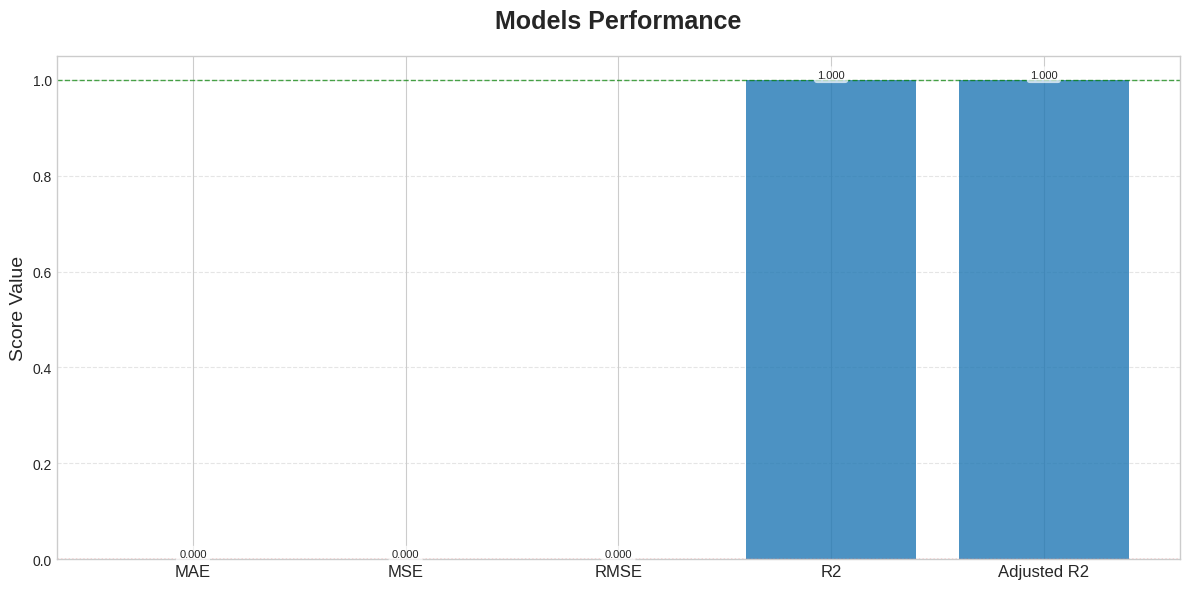

,Metric,Value
0,MAE,0.0
1,MSE,0.0
2,RMSE,0.0
3,R2,1.0
4,Adjusted R2,1.0


In [94]:
def feature_importance(model, n_features):
    # With permutation test
    pass



def metric(y_hat, y_true,features_shape):
    n,p = features_shape
    r2 = r2_score(y_true, y_hat)
    socres = {
        "MAE": mean_absolute_error(y_true, y_hat),
        "MSE": mean_squared_error(y_true, y_hat),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_hat)),
        "R2": r2,
        "Adjusted R2":  1 - (1 - r2) * (n - 1) / (n - p - 1)
    }

    df_score = pd.DataFrame(socres.items(), columns=["Metric","Value"])

    return df_score


dummy  = metric(y_test, y_test, x_train.shape)

def plot_meterics(df_dict, metrics_to_plot = ["MAE", "MSE", "RMSE", "R2", "Adjusted R2"]):

    if isinstance(df_dict, pd.DataFrame):
        df_dict = {'Model': df_dict}

    # Define the order and subset of metrics to plot
    metrics_order = {m: i for i, m in enumerate(metrics_to_plot)}

    # Combine and filter dataframes
    all_data = []
    for model_name, df in df_dict.items():
        # Filter for the required metrics
        filtered_df = df[df['Metric'].isin(metrics_to_plot)].copy()
        filtered_df['Model'] = model_name
        all_data.append(filtered_df)

    if not all_data:
        print("Error: No data available to plot after filtering.")
        return

    combined_df = pd.concat(all_data, ignore_index=True)

    # Sort the dataframe according to the predefined metric order
    combined_df['Order'] = combined_df['Metric'].map(metrics_order)
    combined_df.sort_values(by=['Order', 'Model'], inplace=True)

    # --- Plotting ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 6))

    models = combined_df['Model'].unique()
    n_models = len(models)
    n_metrics = len(metrics_to_plot)
    bar_width = 0.8 / n_models

    x_base = np.arange(n_metrics)

    for i, model in enumerate(models):
        model_data = combined_df[combined_df['Model'] == model]
        values = model_data['Value'].values

        # Calculate position for this model's bars
        offset = (i - (n_models - 1) / 2) * bar_width
        bars = ax.bar(x_base + offset, values, bar_width, label=model, alpha=0.8)

        # Add value labels on top of the bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=8,
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))


    # Customizing the plot
    ax.set_xticks(x_base)
    ax.set_xticklabels(metrics_to_plot, fontsize=12, fontweight='medium')
    ax.set_ylabel('Score Value', fontsize=14)
    ax.set_title("Models Performance", fontsize=18, fontweight='bold', pad=20)

    # Add legend if needed
    if n_models > 1 or models[0] != 'Model':
        ax.legend(title='Model', fontsize=10, title_fontsize=12, frameon=True, shadow=True)

    # Add horizontal lines for R2/Adj R2 targets for context
    ax.axhline(1.0, color='green', linestyle='--', linewidth=1.0, alpha=0.7, label='Perfect Fit (R2=1.0)')
    ax.axhline(0.0, color='red', linestyle=':', linewidth=1.0, alpha=0.7, label='Baseline Fit (R2=0.0)')

    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


plot_meterics(dummy)
dummy

# Features Selection

In [95]:
def select_features(selector):
    global x_train, y_train

    selector.fit(x_train, y_train)
    mask = selector.get_support()

    new_x = selector.fit_transform(x_train, y_train)

    selected_names = df_features.columns[mask]

    df_selected = df_features[selected_names]

    return df_selected



## Variance Treshold (Filter Method)

In [96]:
VT = SelectKBest(f_regression, k=5)
select_features(VT)

,bmi,bp,s3,s4,s5
0,0.032595,0.049415,-0.069172,0.034309,0.063015
1,0.085408,0.063187,0.015505,-0.002592,0.006207
2,-0.010517,0.025315,-0.039719,0.034309,0.020609
3,0.110198,0.063187,-0.024993,0.020655,0.099241
4,-0.006206,-0.019442,-0.039719,0.034309,0.014821
...,...,...,...,...,...
304,-0.076264,-0.043542,0.008142,-0.039493,-0.059471
305,0.030440,0.083844,0.015505,-0.039493,0.008641
306,-0.020218,-0.005670,0.078093,-0.039493,-0.010903
307,-0.023451,-0.040099,-0.017629,-0.002592,-0.038460


## Unvariate Selection (Filter Method)

In [97]:
US = SelectKBest(mutual_info_regression, k=5)
select_features(US)

,bmi,s2,s4,s5,s6
0,0.032595,-0.043589,0.034309,0.063015,0.003064
1,0.085408,0.013091,-0.002592,0.006207,0.085907
2,-0.010517,0.040022,0.034309,0.020609,0.056912
3,0.110198,-0.032942,0.020655,0.099241,0.023775
4,-0.006206,0.004949,0.034309,0.014821,0.098333
...,...,...,...,...,...
304,-0.076264,-0.034821,-0.039493,-0.059471,-0.083920
305,0.030440,-0.047347,-0.039493,0.008641,0.015491
306,-0.020218,-0.029497,-0.039493,-0.010903,-0.001078
307,-0.023451,0.004636,-0.002592,-0.038460,-0.038357


## RFE (Wrapper Method)

In [98]:
from sklearn.linear_model import LinearRegression, Ridge

rfe_cv = RFECV(LinearRegression(), cv=5, scoring='neg_mean_squared_error')
select_features(rfe_cv)

,sex,bmi,bp,s1,s2,s3,s4,s5
0,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015
1,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207
2,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609
3,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241
4,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821
...,...,...,...,...,...,...,...,...
304,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471
305,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641
306,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903
307,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460


## Model-Based (Embedded methods)

In [99]:
from sklearn.linear_model import Lasso
MBS = SelectFromModel(Lasso())
select_features(MBS)

,bmi,bp,s5
0,0.032595,0.049415,0.063015
1,0.085408,0.063187,0.006207
2,-0.010517,0.025315,0.020609
3,0.110198,0.063187,0.099241
4,-0.006206,-0.019442,0.014821
...,...,...,...
304,-0.076264,-0.043542,-0.059471
305,0.030440,0.083844,0.008641
306,-0.020218,-0.005670,-0.010903
307,-0.023451,-0.040099,-0.038460


### RandomForest Regressor Feature Importance

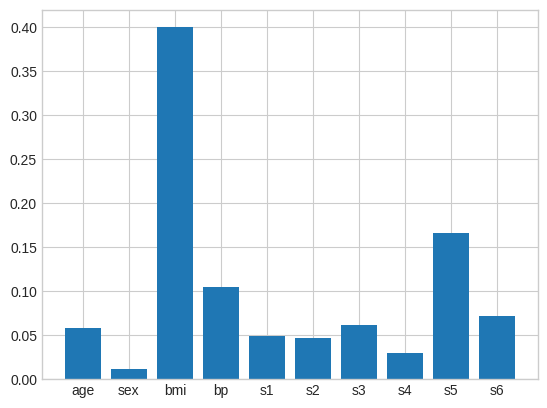

In [100]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

imp = model.feature_importances_

plt.bar(names,imp)
plt.show()

## Voting Selection - just voting (we can choose threshold in need)

In [101]:
votes = dict(zip(names, [0]*10))
for v in select_features(VT).columns:
    votes[v] += 1

for v in select_features(US).columns:
    votes[v] += 1

for v in select_features(MBS).columns:
    votes[v] += 1

df_votes = pd.DataFrame.from_dict(votes, orient='index')
df_votes.columns = ['votes']
df_votes

,votes
age,0
sex,0
bmi,3
bp,2
s1,0
s2,1
s3,1
s4,2
s5,3
s6,1


# Piplines

In [102]:
def create_Pipes(model, k=5, n_df_features=5):
    baseline = Pipeline([('regressor', model)])
    kbest = Pipeline([('feature_selection', SelectKBest(f_regression, k=5)),('regressor', model)])
    rfe = Pipeline([('feature_selection', RFE(n_features_to_select=5, estimator=LinearRegression())),('regressor', model)])
    mbs = Pipeline([('feature_selection', SelectFromModel(Lasso())), ('regressor', model)])

    #TO DO - CV Method Selection
    pipes = {'baseline': baseline, 'kbest': kbest, 'rfe': rfe, 'mbs': mbs}
    names = pipes.keys()
    scores = {}

    for name in names:
        clf = pipes[name]

        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        scores[name] = cross_val_score(clf, x_train, y_train, cv=cv, scoring= 'neg_mean_squared_error').mean()

    scores = ({k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)})

    df_result = pd.DataFrame.from_dict(scores, orient='index')
    df_result.columns = ["neg_MSE score"]

    print(df_result)
    print()

    best = pipes[list(scores.keys())[0]]
    result_dict = {
        "BaseLine": baseline,
        'KBest': kbest,
        'RFE': rfe,
        'MBS': mbs,
        'Best_cv': best
    }

    return result_dict

## Testing for model without parameters optimalization

In [103]:
models = {'KNN Regressor': KNeighborsRegressor(), 'SVR': SVR(), 'RF Regressor' : RandomForestRegressor(), 'XGBoost Regressor' : XGBRegressor()}

model_names = list(models.keys())
models_and_pipes = {}

for n in model_names:
    print(n)
    models_and_pipes[n] = create_Pipes(models[n])
    print()



KNN Regressor
          neg_MSE score
rfe        -3756.778388
baseline   -3830.840023
mbs        -4189.562304
kbest      -4388.347042


SVR
          neg_MSE score
mbs        -5157.099696
kbest      -5276.698406
rfe        -5340.209889
baseline   -5551.538449


RF Regressor
          neg_MSE score
baseline   -3599.758453
rfe        -3726.646504
kbest      -3751.645186
mbs        -4242.593976


XGBoost Regressor
          neg_MSE score
baseline   -4218.688912
rfe        -4338.502725
kbest      -4773.875693
mbs        -5249.416732




## Models with and without feature selection

In [104]:
def fit_and_test(model):
    global x_train, y_train, x_test, y_test

    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)

    feature_shape = x_test.shape

    return metric(y_test, y_hat, feature_shape)


### Base models without feature slection

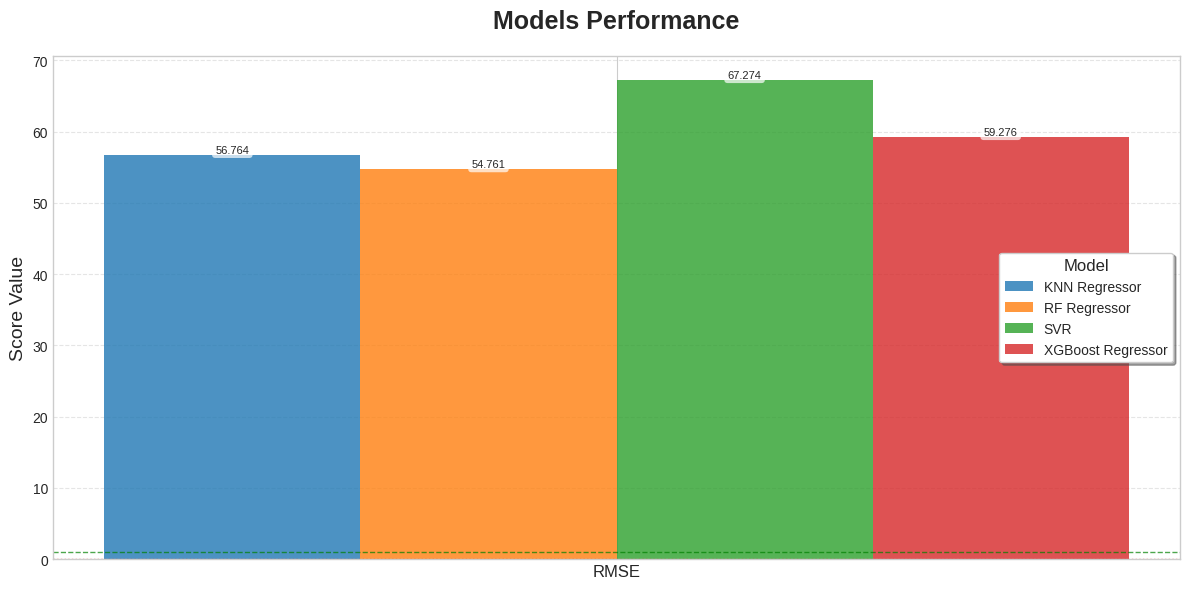

In [105]:
dummy_models_scores = {}

for n in model_names:
    dummy_models_scores[n] = fit_and_test(models[n])


plot_meterics(dummy_models_scores, metrics_to_plot=["RMSE"])

### Base Model with feature selection for best CV selection

In [106]:
def fit_and_test_with_pipe(pipe):
    global x_train, y_train, x_test, y_test
    pipe.fit(x_train, y_train)
    y_hat = pipe.predict(x_test)

    if len(pipe.named_steps) > 1:
        selector = pipe.named_steps['feature_selection']
        p_selected = (selector.get_support()).sum()
        feature_shape = (len(x_test),  p_selected)
    else:
        feature_shape = x_test.shape

    return metric(y_test, y_hat, feature_shape)


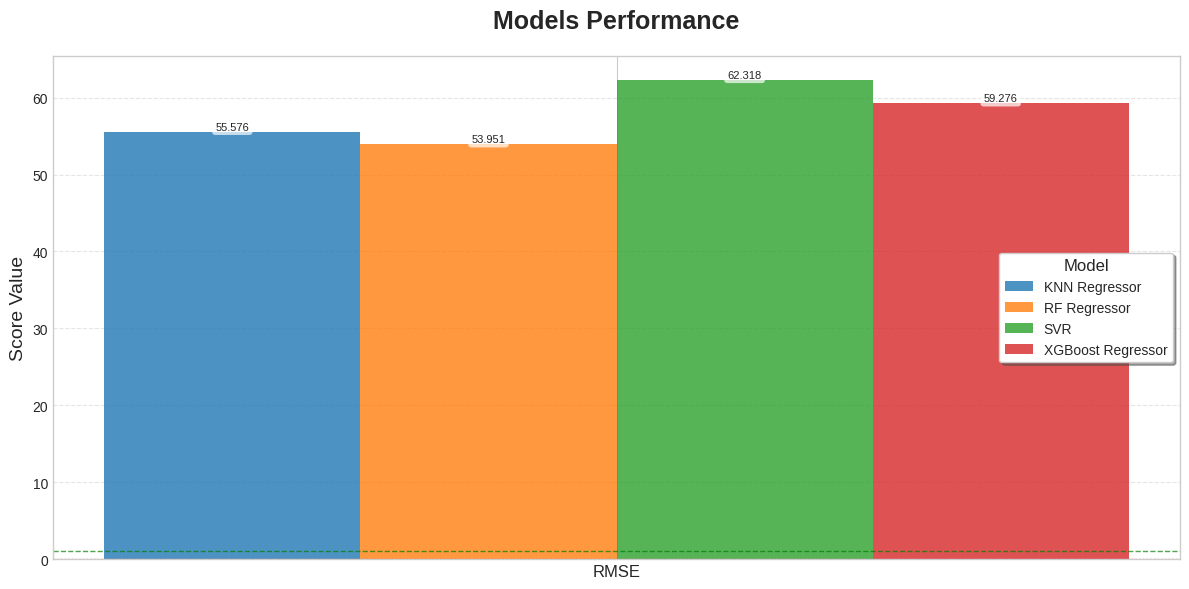

In [107]:
selected_predictor_scores = {}

for n in model_names:
    selected_predictor_scores[n] = fit_and_test_with_pipe(models_and_pipes[n]['Best_cv'])


plot_meterics(selected_predictor_scores, metrics_to_plot=["RMSE"])

# Optimization with optuna
For each model class we will take the best selector that get highest cv score for this specific model

## Yet Another Metrics Function

In [108]:
def selected_features(selector):
    mask = selector.get_support()
    selected_names = df_features.columns[mask]
    return list(selected_names)

def optimize_train_and_judge(selector_class,model_class, objective_fn, trails=100):
    global x_train, y_train, x_test, y_test, names

    study = optuna.create_study(direction="maximize")

    start = time.time()
    study.optimize(objective_fn, n_trials=trails, show_progress_bar=True)
    stop = time.time()

    best_params = study.best_params.copy()

    if selector_class is not None:
        best_params['feature_selector__estimator'] = LinearRegression() if best_params['feature_selector__estimator']=='Linear' else Lasso()

        if selector_class is RFE or selector_class is SelectFromModel:
            pipe = Pipeline([('feature_selector', selector_class(estimator=LinearRegression())), ('regressor', model_class())])
        else:
            pipe = Pipeline([('feature_selector', selector_class()), ('regressor', model_class())])
    else:
        pipe = model_class()

    pipe.set_params(**best_params)

    pipe.fit(x_train, y_train)
    y_hat_train = pipe.predict(x_train)
    y_hat_test = pipe.predict(x_test)

    if selector_class is not None:
        selector = pipe.named_steps['feature_selector']
        names_selected = selected_features(selector)
        features_shape = [x_test.shape[0], len(names_selected)]
    else:
        features_shape = x_test.shape
        names_selected = names

    df_train = metric(y_hat_train, y_train, features_shape)
    df_test = metric(y_hat_test, y_test, features_shape)


    print("Selected Features")
    print(names_selected)

    print("Training Scores")
    print(df_train)
    print()
    print("Testing Scores")
    print(df_test)


    new_row_df = pd.DataFrame({
    'Metric': ['n_features_selected', 'time'],
    'Value': [len(names_selected), stop-start]
    })

    df_result = pd.concat([df_test, new_row_df], axis=0, ignore_index=True)
    return pipe, df_result

## Feature Importance
def calculate_feature_importance(pipline, n_repeats=25, print_imp=False):
    global x_train, y_train

    r = permutation_importance(pipline, x_train, y_train, n_repeats=25, random_state=42)

    importance_mean = []
    importance_std = []

    for i in range(len(names)):
        importance_mean.append(r.importances_mean[i])
        importance_std.append(r.importances_std[i])

        if print_imp:
            print(f"{df_features.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

    df_feature_importance = pd.DataFrame({
        "Name": names,
        "Mean": importance_mean,
        "Std": importance_std
    })

    return df_feature_importance


## KNN Regressor with RFE

In [109]:
def objective_KNN(trail):

    n_neighbors = trail.suggest_int("regressor__n_neighbors", 1, 80)
    weights = trail.suggest_categorical('regressor__weights', ['uniform', 'distance'])
    metric  = trail.suggest_categorical('regressor__metric', ['manhattan', 'euclidean','minkowski'])
    n_steps_to_select = trail.suggest_int("feature_selector__n_features_to_select", 1, 10)
    estimator_name = trail.suggest_categorical('feature_selector__estimator', ['Linear', 'Lasso'])
    estimator = LinearRegression() if estimator_name=='Linear' else Lasso()


    pipe = Pipeline([('feature_selector', RFE(estimator=estimator, n_features_to_select=n_steps_to_select)), ('regressor', KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, metric=metric))])
    pipe.fit(x_train, y_train)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(pipe, x_train, y_train, cv=cv, scoring= 'neg_mean_squared_error').mean()

    return score


knn_pipe, knn_result = optimize_train_and_judge(RFE,KNeighborsRegressor,objective_KNN, trails=25)
knn_result

[I 2025-11-18 00:05:57,264] A new study created in memory with name: no-name-52cf8b3d-e351-47e1-abd4-a429f6844ab2


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-11-18 00:05:57,308] Trial 0 finished with value: -3619.553296483328 and parameters: {'regressor__n_neighbors': 25, 'regressor__weights': 'distance', 'regressor__metric': 'minkowski', 'feature_selector__n_features_to_select': 8, 'feature_selector__estimator': 'Lasso'}. Best is trial 0 with value: -3619.553296483328.
[I 2025-11-18 00:05:57,379] Trial 1 finished with value: -4435.9265834685 and parameters: {'regressor__n_neighbors': 4, 'regressor__weights': 'distance', 'regressor__metric': 'minkowski', 'feature_selector__n_features_to_select': 2, 'feature_selector__estimator': 'Linear'}. Best is trial 0 with value: -3619.553296483328.
[I 2025-11-18 00:05:57,429] Trial 2 finished with value: -3639.4247275853754 and parameters: {'regressor__n_neighbors': 21, 'regressor__weights': 'uniform', 'regressor__metric': 'euclidean', 'feature_selector__n_features_to_select': 3, 'feature_selector__estimator': 'Linear'}. Best is trial 0 with value: -3619.553296483328.
[I 2025-11-18 00:05:57,471

,Metric,Value
0,MAE,44.410062
1,MSE,3058.560927
2,RMSE,55.304258
3,R2,0.433422
4,Adjusted R2,0.391965
5,n_features_selected,9.000000
6,time,0.928568


### Feature Imporance for this pipline

In [110]:
calculate_feature_importance(knn_pipe)

,Name,Mean,Std
0,age,0.000000,0.000000
1,sex,0.281170,0.021456
2,bmi,0.567028,0.028038
3,bp,0.485268,0.015950
4,s1,0.396826,0.008980
5,s2,0.405204,0.010620
6,s3,0.426386,0.015778
7,s4,0.384307,0.015130
8,s5,0.480197,0.019826
9,s6,0.418492,0.014407


## SVR with ModelBased Selection

In [111]:
def objective_SVR_mbs(trial):

    # Selector Params
    estimator_name = trial.suggest_categorical('feature_selector__estimator', ['Linear', 'Lasso'])
    threshold = trial.suggest_float('feature_selector__threshold', 0.001, 0.01)

    estimator = LinearRegression() if estimator_name=='Linear' else Lasso()

    # Model Params
    C = trial.suggest_float("regressor__C", 0.01, 1)
    epsilon = trial.suggest_float("regressor__epsilon", 0.001, 0.01)
    kernel = trial.suggest_categorical('regressor__kernel', ['poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical("regressor__gamma", ['scale', 'auto'])

    pipe = Pipeline([('feature_selector', SelectFromModel(estimator=estimator, threshold=threshold)), ('regressor', SVR())])
    pipe.fit(x_train, y_train)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(pipe, x_train, y_train, cv=cv, scoring= 'neg_mean_squared_error').mean()

    return score


svr_pipe, svr_results = optimize_train_and_judge(SelectFromModel, SVR, objective_SVR_mbs, trails=100)
svr_results

[I 2025-11-18 00:05:59,198] A new study created in memory with name: no-name-762d3edb-9dc4-48ad-8e2c-4e4218ddb63a


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-11-18 00:05:59,235] Trial 0 finished with value: -5551.538449307659 and parameters: {'feature_selector__estimator': 'Linear', 'feature_selector__threshold': 0.0022125106904606075, 'regressor__C': 0.16217856834680036, 'regressor__epsilon': 0.00398063001351371, 'regressor__kernel': 'sigmoid', 'regressor__gamma': 'scale'}. Best is trial 0 with value: -5551.538449307659.
[I 2025-11-18 00:05:59,274] Trial 1 finished with value: -5551.538449307659 and parameters: {'feature_selector__estimator': 'Linear', 'feature_selector__threshold': 0.009699542728958701, 'regressor__C': 0.46309898237804215, 'regressor__epsilon': 0.0014780538247797274, 'regressor__kernel': 'rbf', 'regressor__gamma': 'scale'}. Best is trial 0 with value: -5551.538449307659.
[I 2025-11-18 00:05:59,315] Trial 2 finished with value: -5551.538449307659 and parameters: {'feature_selector__estimator': 'Linear', 'feature_selector__threshold': 0.006796648293763733, 'regressor__C': 0.30788788105435544, 'regressor__epsilon': 0

,Metric,Value
0,MAE,46.386520
1,MSE,3135.400303
2,RMSE,55.994645
3,R2,0.419188
4,Adjusted R2,0.405681
5,n_features_selected,3.000000
6,time,3.465280


### Feature Importance SVR

In [112]:
calculate_feature_importance(svr_pipe)

,Name,Mean,Std
0,age,0.000000,0.000000
1,sex,0.000000,0.000000
2,bmi,0.175103,0.022785
3,bp,0.088254,0.014972
4,s1,0.000000,0.000000
5,s2,0.000000,0.000000
6,s3,0.000000,0.000000
7,s4,0.000000,0.000000
8,s5,0.134276,0.015942
9,s6,0.000000,0.000000


## rf_regressor + baseline

In [113]:
def RF_study(trail):

    n_estimators = trail.suggest_int("n_estimators", 75, 125)
    max_depth = trail.suggest_int("max_depth", 2, 10)
    min_samples_split = trail.suggest_int("min_samples_split", 2, 10)
    max_features = trail.suggest_categorical("max_features", ["sqrt", 'log2', 1.0])

    clf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features ,random_state=42)
    clf.fit(x_train, y_train)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(clf, x_train, y_train, cv=cv, scoring= 'neg_mean_squared_error').mean()

    return score

rf_model, rf_results = optimize_train_and_judge(None, RandomForestRegressor,RF_study ,trails=10)
rf_results

[I 2025-11-18 00:06:04,075] A new study created in memory with name: no-name-6f2869a0-e945-4d35-b6d9-8b56d06ad630


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-11-18 00:06:04,508] Trial 0 finished with value: -3692.3729536614455 and parameters: {'n_estimators': 93, 'max_depth': 3, 'min_samples_split': 9, 'max_features': 'log2'}. Best is trial 0 with value: -3692.3729536614455.
[I 2025-11-18 00:06:04,971] Trial 1 finished with value: -3595.2665623632192 and parameters: {'n_estimators': 93, 'max_depth': 6, 'min_samples_split': 7, 'max_features': 'log2'}. Best is trial 1 with value: -3595.2665623632192.
[I 2025-11-18 00:06:05,444] Trial 2 finished with value: -3616.3250421452676 and parameters: {'n_estimators': 96, 'max_depth': 5, 'min_samples_split': 5, 'max_features': 'log2'}. Best is trial 1 with value: -3595.2665623632192.
[I 2025-11-18 00:06:06,234] Trial 3 finished with value: -3495.4477248157064 and parameters: {'n_estimators': 118, 'max_depth': 6, 'min_samples_split': 8, 'max_features': 1.0}. Best is trial 3 with value: -3495.4477248157064.
[I 2025-11-18 00:06:06,681] Trial 4 finished with value: -3605.1069213746896 and parameter

,Metric,Value
0,MAE,42.800356
1,MSE,2898.079309
2,RMSE,53.833812
3,R2,0.463150
4,Adjusted R2,0.419146
5,n_features_selected,10.000000
6,time,5.062711


## Rf_regressor feature importance Permutation vs RF

In [114]:
df_permutation = calculate_feature_importance(rf_model)
df_permutation['rf_feature_importance'] = rf_model.feature_importances_

df_permutation

,Name,Mean,Std,rf_feature_importance
0,age,0.043352,0.004180,0.044924
1,sex,0.009712,0.001214,0.008128
2,bmi,0.519540,0.040934,0.417978
3,bp,0.136416,0.011941,0.100523
4,s1,0.042770,0.002780,0.043196
5,s2,0.041310,0.002920,0.042991
6,s3,0.068236,0.006302,0.055850
7,s4,0.020148,0.002447,0.026843
8,s5,0.254163,0.020870,0.189775
9,s6,0.079234,0.009335,0.069794


## XGBoost and baseline

In [115]:
def XGBoost_study(trail):
    n_estimators = trail.suggest_int("n_estimators", 75, 125)
    max_depth = trail.suggest_int("max_depth", 2, 10)
    learning_rate = trail.suggest_float("learning_rate", 0.01, 0.05)
    subsample = trail.suggest_float("subsample", 0.1, 1.0)
    colsample_bytree = trail.suggest_float("colsample_bytree", 0.1, 1.0)

    clf = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, subsample=subsample, colsample_bytree=colsample_bytree)
    clf.fit(x_train, y_train)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(clf, x_train, y_train, cv=cv, scoring= 'neg_mean_squared_error').mean()

    return score

xgboost_model, xgb_results = optimize_train_and_judge(None, XGBRegressor,XGBoost_study ,trails=100)

[I 2025-11-18 00:06:10,724] A new study created in memory with name: no-name-c6ef4569-e174-4d5a-a2c2-195cc15be23c


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-11-18 00:06:11,579] Trial 0 finished with value: -5105.369527337972 and parameters: {'n_estimators': 125, 'max_depth': 9, 'learning_rate': 0.011800315714134793, 'subsample': 0.5290035543477831, 'colsample_bytree': 0.15039352342822437}. Best is trial 0 with value: -5105.369527337972.
[I 2025-11-18 00:06:11,923] Trial 1 finished with value: -3848.8173226100357 and parameters: {'n_estimators': 99, 'max_depth': 4, 'learning_rate': 0.02830569369914552, 'subsample': 0.116638258868662, 'colsample_bytree': 0.46375109400474845}. Best is trial 1 with value: -3848.8173226100357.
[I 2025-11-18 00:06:12,234] Trial 2 finished with value: -3554.764208399459 and parameters: {'n_estimators': 95, 'max_depth': 2, 'learning_rate': 0.04127151642770712, 'subsample': 0.883358218397998, 'colsample_bytree': 0.3743212762332495}. Best is trial 2 with value: -3554.764208399459.
[I 2025-11-18 00:06:13,994] Trial 3 finished with value: -3788.2586202959806 and parameters: {'n_estimators': 124, 'max_depth': 1

## XGBoost feature importance

In [116]:
calculate_feature_importance(xgboost_model)

,Name,Mean,Std
0,age,0.031811,0.004468
1,sex,0.014664,0.002762
2,bmi,0.325437,0.029873
3,bp,0.116370,0.012456
4,s1,0.028770,0.002911
5,s2,0.030919,0.003401
6,s3,0.058713,0.007719
7,s4,0.021368,0.004163
8,s5,0.199669,0.017259
9,s6,0.039181,0.005182


# Visualisation Examples
Correlation matrix heatmap is introduced in Data and data split section

## Features importance plots

### Via Ridge model coeficients

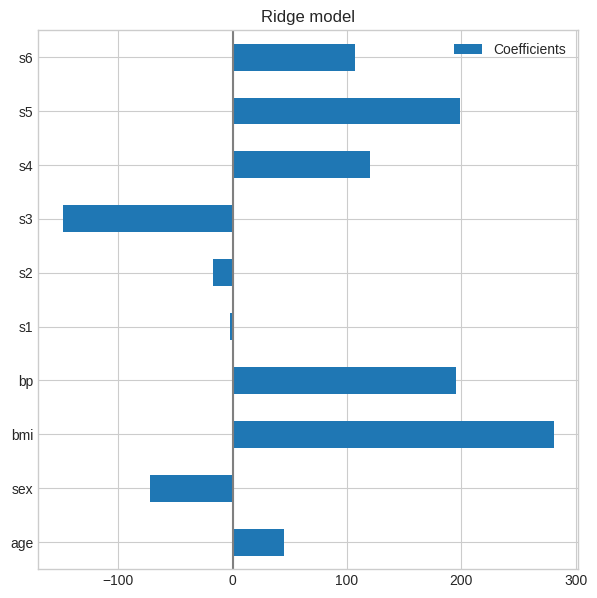

In [117]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train, y_train)


coefs = pd.DataFrame(
    model.coef_, columns=["Coefficients"], index=names
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

### Via Permutation test for xgboost

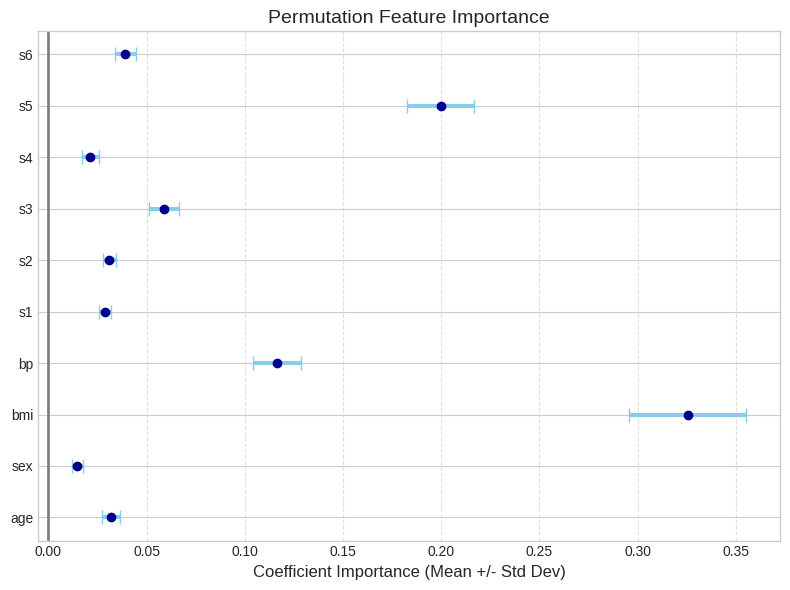

,Name,Mean,Std
0,age,0.031811,0.004468
1,sex,0.014664,0.002762
2,bmi,0.325437,0.029873
3,bp,0.116370,0.012456
4,s1,0.028770,0.002911
5,s2,0.030919,0.003401
6,s3,0.058713,0.007719
7,s4,0.021368,0.004163
8,s5,0.199669,0.017259
9,s6,0.039181,0.005182


In [118]:
import seaborn as sns

df_imp = calculate_feature_importance(xgboost_model)
means = df_imp['Mean']
stds = df_imp['Std']

plt.figure(figsize=(8, 6))
y_pos = np.arange(len(names))
# Use errorbar() to plot the mean with the standard deviation as the error
plt.errorbar(
    x=means,
    y=y_pos,
    xerr=stds,      # Horizontal error bars using Std Dev
    fmt='o',        # Display mean as a circle marker
    color='darkblue',
    ecolor='skyblue', # Color of the error bar lines
    capsize=5,      # Length of the error bar caps
    elinewidth=3    # Thickness of the error bar lines
)

# Add the vertical line at 0 (essential for importance plots)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=2)

# Set the feature names as the Y-axis labels

plt.yticks(y_pos, names)

# Add titles and labels for clarity
plt.xlabel('Coefficient Importance (Mean +/- Std Dev)', fontsize=12)
plt.title('Permutation Feature Importance', fontsize=14)
plt.ylabel('') # Clear the y-label since features are the labels

# Clean up the layout and show the plot
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

df_imp

### Via RF feature Importance

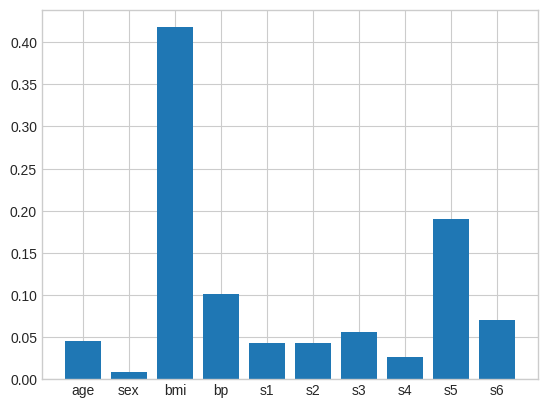

In [119]:
imp = rf_model.feature_importances_

plt.bar(names,imp)
plt.show()

# Feature Importance vs $R^2$ for base models

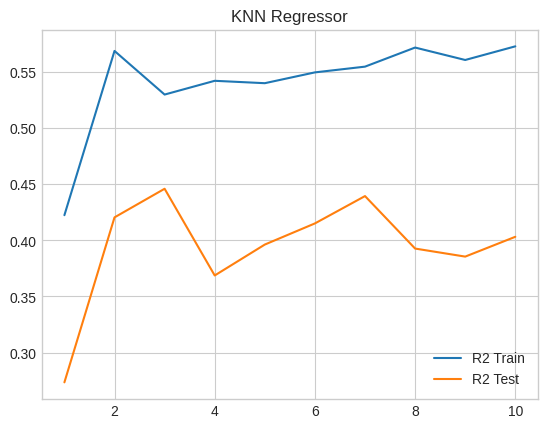

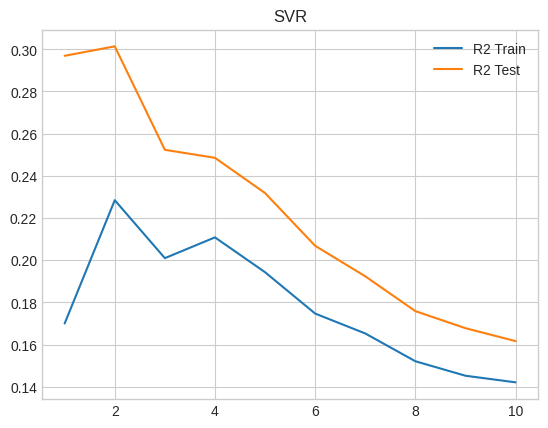

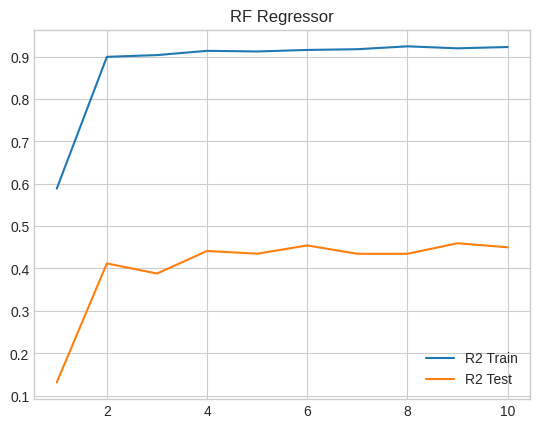

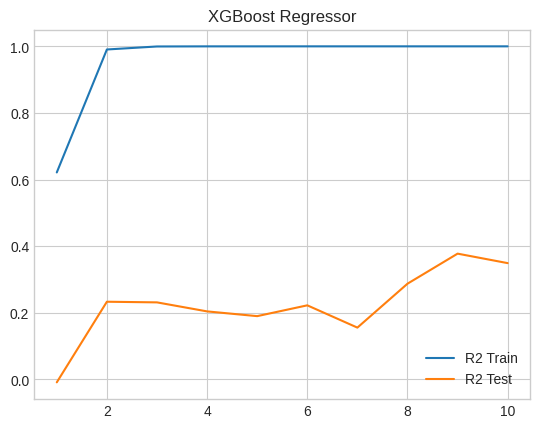

In [120]:

for m in model_names:

    R2_train = []
    R2_test = []
    idx= []

    for i in range(1, 11):
        pipe = Pipeline([('feature_importance', SelectKBest(k=i)), ('regressor', models[m])])
        pipe.fit(x_train, y_train)

        pred_train = pipe.predict(x_train)
        R2_train.append(r2_score(y_train, pred_train))
        pred_test = pipe.predict(x_test)
        R2_test.append(r2_score(y_test, pred_test))
        idx.append(i)


    plt.plot(idx, R2_train, label="R2 Train")
    plt.plot(idx, R2_test, label="R2 Test")
    plt.title(m)
    plt.legend()
    plt.show()